<a href="https://colab.research.google.com/github/JogendraSingh1879/L1-AND-L2-Regularisation/blob/main/As_L1_%26_L2_Reg_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# **Loading the Dataset**

In [2]:
data = pd.read_csv('PH.csv')

In [4]:
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


## **Summarizing the Dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [7]:
data.dtypes

,0
squareMeters,int64
numberOfRooms,int64
hasYard,int64
hasPool,int64
floors,int64
cityCode,int64
cityPartRange,int64
numPrevOwners,int64
made,int64
isNewBuilt,int64


In [9]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


# **Visualizing the Dataset**

In [10]:
import matplotlib.pyplot as plt

In [11]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


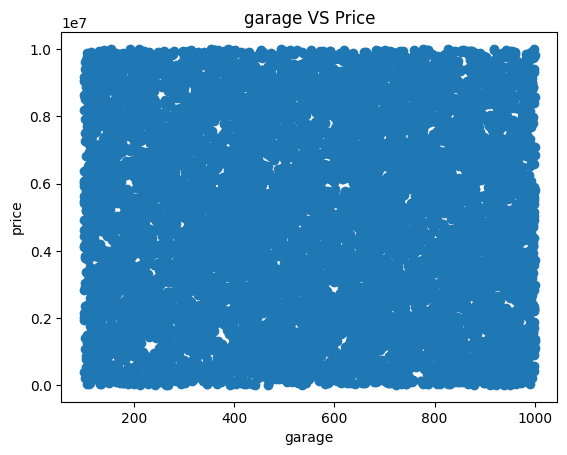

In [20]:
plt.scatter(data['garage'],data['price'])
plt.xlabel('garage')
plt.ylabel('price')
plt.title('garage VS Price')
plt.show()

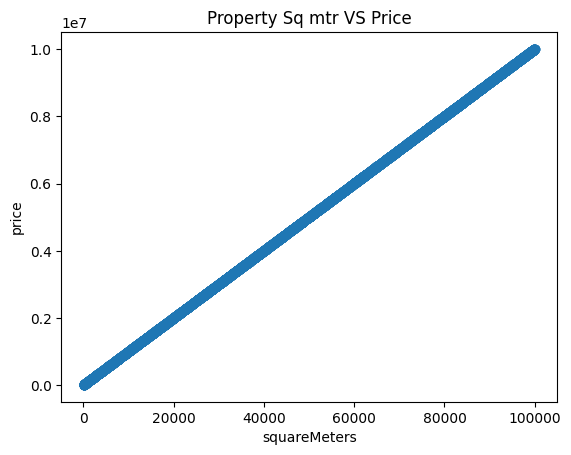

In [12]:
plt.scatter(data['squareMeters'],data['price'])
plt.xlabel('squareMeters')
plt.ylabel('price')
plt.title('Property Sq mtr VS Price')
plt.show()

# **Pre-processing the Dataset**

In [21]:
data.isnull().sum()

,0
squareMeters,0
numberOfRooms,0
hasYard,0
hasPool,0
floors,0
cityCode,0
cityPartRange,0
numPrevOwners,0
made,0
isNewBuilt,0


# **Segregating the Dataset into Input(x) and Output(y)**

In [22]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [29]:
x = data.iloc[:,:-1].values

In [30]:
x

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]])

In [31]:
y = data.iloc[:,-1].values

In [32]:
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

# **Splitting the Dataset into Training and Testing Data**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
x.shape, y.shape

((10000, 16), (10000,))

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 16), (2000, 16), (8000,), (2000,))

# **Loading the Models**

In [37]:
# Lasso - L1
# Ridge - L2

In [38]:
from sklearn.linear_model import Lasso, Ridge

In [39]:
L1_Model = Lasso()
L2_Model = Ridge()

In [40]:
L1_Model

Lasso()

In [41]:
L2_Model

Ridge()

# **Training the Models**

In [42]:
L1_Model.fit(x_train,y_train)

Lasso()

In [43]:
L2_Model.fit(x_train,y_train)

Ridge()

# **Predicting the Result Using the Trained Models**

In [44]:
y1_pred = L1_Model.predict(x_test)
y1_pred

array([7962632.06929843, 3715850.76017299, 8553847.15737828, ...,
       1951269.54544986, 2945550.97345969, 7042694.38266334])

In [45]:
y2_pred = L2_Model.predict(x_test)
y2_pred

array([7962638.37959641, 3715850.76419282, 8553849.76873324, ...,
       1951271.3503438 , 2945553.1077178 , 7042691.68636637])

# **Calculating the Accuracy of the Trained Models**

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,y1_pred)

0.9999995780056931

In [48]:
r2_score(y_test,y2_pred)

0.9999995780535079

# **Predicting the Output of Single Test Data using the Trained Model**

In [49]:
y_test

array([7964369.6, 3713548.9, 8553019.2, ..., 1947709.8, 2944295.3,
       7041725.7])

In [51]:
x_test[0]

array([79553,     7,     1,     0,    61, 35059,     8,     2,  1996,
           1,     1,  3372,  7603,   896,     1,     1])

In [57]:
x_test[16]

array([60136,    32,     0,     1,    54, 20364,     5,     3,  1995,
           0,     0,  8341,  4965,   152,     1,     4])

In [58]:
x_test[16].shape

(16,)

In [59]:
x_test[16].reshape(1,16)

array([[60136,    32,     0,     1,    54, 20364,     5,     3,  1995,
            0,     0,  8341,  4965,   152,     1,     4]])

In [60]:
x_test[16].reshape(1,16).shape

(1, 16)

In [61]:
L1_Model.predict(x_test[16].reshape(1,16))

array([6020087.05191586])

In [63]:
L1_Model.predict(x_test[16].reshape(1,16))

array([6020087.05191586])

In [64]:
y_test[16]

6020434.5

# **Visualizing the Result**

# **L1 MODEL**

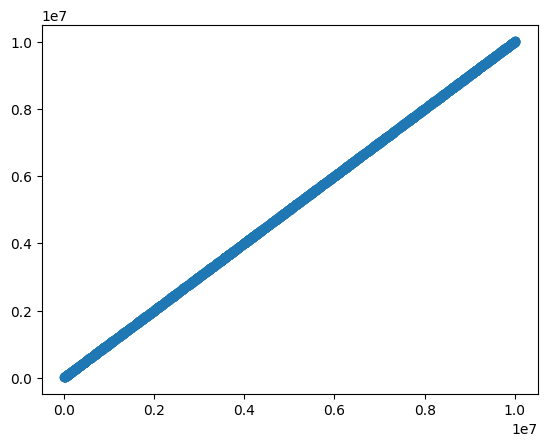

In [65]:
plt.scatter(y_test,y1_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])

# **L2 MODEL**

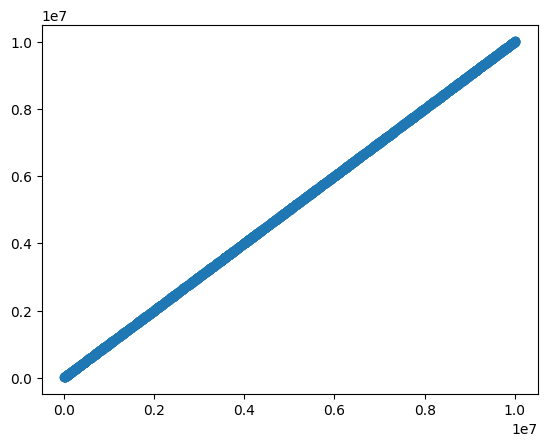

In [66]:
plt.scatter(y_test,y2_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])

# **L1 and L2 Model**

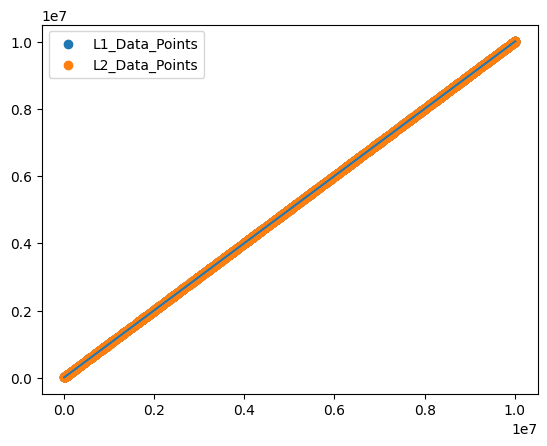

In [67]:
plt.scatter(y_test,y1_pred,label='L1_Data_Points')
plt.scatter(y_test,y2_pred,label='L2_Data_Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.legend()
plt.show()